In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, confusion_matrix 
# Load dataset (misalnya dataset transaksi penipuan) 
data = pd.read_csv('creditcard.csv') 
# Preprocessing 
X = data.drop('Class', axis=1)  # Fitur 
y = data['Class']  # Target 
# Split dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
random_state=42) 
# Define model 
model = LogisticRegression() 
# Train model 
model.fit(X_train, y_train) 
# Predict 
y_pred = model.predict(X_test) 
# Evaluation 
cm = confusion_matrix(y_test, y_pred) 
print("Confusion Matrix:\n", cm) 
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[85281    26]
 [   48    88]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.77      0.65      0.70       136

    accuracy                           1.00     85443
   macro avg       0.89      0.82      0.85     85443
weighted avg       1.00      1.00      1.00     85443



c:\Users\anugr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


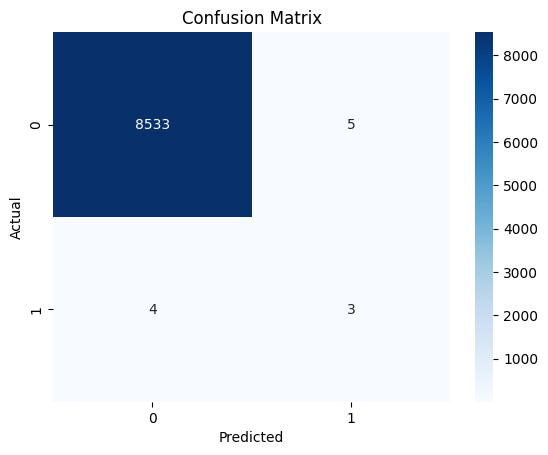

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8538
           1       0.38      0.43      0.40         7

    accuracy                           1.00      8545
   macro avg       0.69      0.71      0.70      8545
weighted avg       1.00      1.00      1.00      8545



['rf_model.joblib']

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump

# Load dataset
data = pd.read_csv('creditcard.csv')

# Gunakan 10% sampel data agar proses lebih cepat
data_sampled = data.sample(frac=0.1, random_state=42)

# Pisahkan fitur dan target
X = data_sampled.drop('Class', axis=1)
y = data_sampled['Class']

# Split dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inisialisasi model RandomForest dengan class_weight dan estimators lebih sedikit
model = RandomForestClassifier(n_estimators=10, random_state=42, class_weight='balanced')

# Training model
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi model dengan confusion matrix dan classification report
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Tampilkan laporan klasifikasi
print("Classification Report:\n", classification_report(y_test, y_pred))

# Simpan model ke file
dump(model, 'rf_model.joblib')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
data = pd.read_csv('creditcard.csv')

# Sample data (10% untuk mempercepat proses)
data = data.sample(frac=0.1, random_state=42)

# Preprocessing
X = data.drop('Class', axis=1)
y = data['Class']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Define models with optimized parameters
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', max_depth=5),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=5, n_jobs=-1, class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=50, max_depth=5),
    "Linear SVM": LinearSVC(class_weight='balanced', max_iter=10000),
    "k-NN": KNeighborsClassifier(n_neighbors=5, n_jobs=-1),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"Training model: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred)
    }

# Print results
for name, metrics in results.items():
    print(f"\nModel: {name}")
    print("Confusion Matrix:\n", metrics["Confusion Matrix"])
    print("Classification Report:\n", metrics["Classification Report"])
    print("="*60)


Training model: Logistic Regression


c:\Users\anugr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training model: Decision Tree
Training model: Random Forest
Training model: Gradient Boosting
